# CNN imge classification

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# 设置图片尺寸和批量大小
IMG_SIZE = 160  # 将图片统一调整为 128x128
BATCH_SIZE = 32
NUM_CLASSES = 2  # 猫和狗

# 加载数据集，按 80% 训练、10% 验证、10% 测试划分
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,  # 返回 (image, label) 对
    with_info=True  # 包含数据集信息
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.FMZVGP_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [2]:
def preprocess(image, label):
    # 调整图片大小并归一化到 [0, 1]
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=NUM_CLASSES)  # 将标签转为 one-hot 编码
    return image, label

# 应用预处理，分批次加载数据
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import time

# 构建 CNN 模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 训练模型
start_time = time.time()
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_val
)
end_time = time.time()
print(f"模型训练耗时: {end_time - start_time:.2f} 秒")

# 输出训练完成信息
print("模型训练完成！")

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 960s 2s/step - accuracy: 0.5657 - loss: 0.7082 - val_accuracy: 0.7025 - val_loss: 0.5765
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 975s 2s/step - accuracy: 0.7032 - loss: 0.5730 - val_accuracy: 0.7554 - val_loss: 0.5032
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 936s 2s/step - accuracy: 0.7727 - loss: 0.4772 - val_accuracy: 0.7820 - val_loss: 0.4560
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 984s 2s/step - accuracy: 0.8140 - loss: 0.4052 - val_accuracy: 0.8009 - val_loss: 0.4322
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 936s 2s/step - accuracy: 0.8477 - loss: 0.3455 - val_accuracy: 0.8190 - val_loss: 0.4407
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 937s 2s/step - accuracy: 0.8859 - loss: 0.2688 - val_accuracy: 0.8224 - val_loss: 0.4866
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.9126 - loss: 0.2138 - val_accuracy: 0.8194 - val_loss: 0.5967
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 988s 2s/step - accuracy: 0.9272 - loss: 0.1743 - val_accu

In [6]:
# 在测试集上评估
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"测试集准确率: {test_accuracy:.4f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 34s 462ms/step - accuracy: 0.8148 - loss: 0.6295
测试集准确率: 0.8315


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from font(s) DejaVu Sans.
  fig.canvas

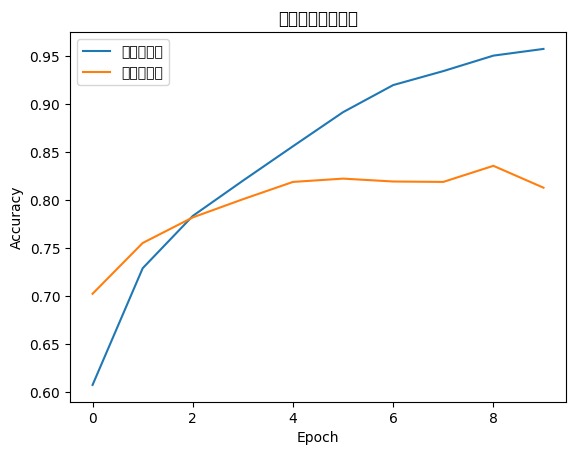

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


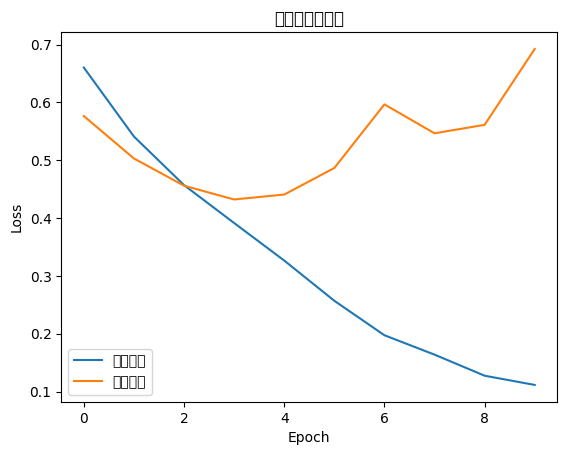

In [7]:
import matplotlib.pyplot as plt

# 绘制训练和验证的准确率
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('训练与验证准确率')
plt.show()

# 绘制训练和验证的损失
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('训练与验证损失')
plt.show()